# **Data Preprocessing Setup & Imports**
This cell performs the initial setup for data preprocessing and model reproducibility:

Imports essential libraries for data manipulation, preprocessing, model evaluation, data resampling, balancing and visualization

Sets a global random seed (np.random.seed(42) and random_state=42) to ensure consistent results across runs for operations involving randomness.



In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import resample, shuffle
import seaborn as sns
from imblearn.over_sampling import SMOTE


np.random.seed(42)
random_state=42

# **Load and Preview Training Data**
The training dataset is loaded from train.csv using pandas.read_csv().

dataTrain.head(10) displays the first 10 rows, allowing a quick initial inspection of the dataset structure, including column names, sample values, and potential data types or inconsistencies.

This step is essential for understanding the data and planning subsequent preprocessing and modeling steps.

In [26]:
dataTrain = pd.read_csv('train.csv')

dataTrain.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0000,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0000,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0000,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0000,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0000,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0000,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0000,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0000,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0000,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0000,neutral or dissatisfied


# **Load and Preview Test Data**
The test dataset is loaded from test.csv using pandas.read_csv().

dataTest.head(10) displays the first 10 rows, offering an initial look at the structure and contents of the test set.

This allows for a quick comparison with the training data to ensure consistency in features and format, which is crucial for accurate model evaluation.

In [3]:
dataTest = pd.read_csv('test.csv')

dataTest.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


# **Dataset Cleaning**

This cell defines and applies a reusable function, clean_dataset(), to clean both the training and test datasets.

The function:


*   replaces empty strings or whitespace-only fields with proper NaN values using regex.
*   Drops rows containing NaN values — either from the entire dataset or a specific subset of columns (if specified).
*   Optionally operates in-place or returns a cleaned copy.
*   Prints a summary of how many rows were removed for transparency.

This is applied to both training and testing, ensuring both datasets are free of missing or improperly formatted values before proceeding with feature engineering or modeling.

In [28]:
import numpy as np
import pandas as pd

def clean_dataset(df, name="Data", columns=None, inplace=False):

    if not inplace:
        df = df.copy()

    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    before = df.shape[0]

    if columns:
        df.dropna(subset=columns, inplace=True)
    else:
        df.dropna(inplace=True)

    after = df.shape[0]
    removed = before - after

    print(f"{name}: Removed {removed} row(s) with missing or blank fields.")
    return df

dataTrain = clean_dataset(dataTrain, name="dataTrain")
dataTest = clean_dataset(dataTest, name="dataTest")

dataTrain: Removed 310 row(s) with missing or blank fields.
dataTest: Removed 0 row(s) with missing or blank fields.


# **Class Distribution in Training Set**

A Seaborn count plot is used to visualize the distribution of the target variable: 'satisfaction'.

value_counts() is printed to show the exact class counts.

This way, we can identify class imbalance, which can negatively impact model performance.


satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64


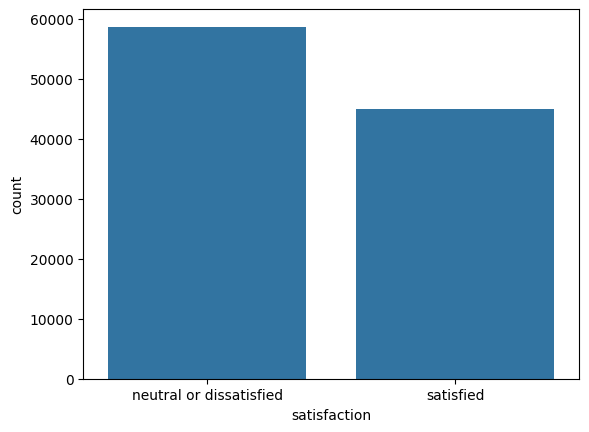

In [29]:
sns.countplot(x='satisfaction', data=dataTrain)
print(dataTrain['satisfaction'].value_counts())

# **Class Distribution in Test Set**

A count plot is used to visualize how the 'satisfaction' classes are distributed in the test dataset.

value_counts() displays the exact number of samples per class.

The test set maintains a similar class distribution to the training set (or at least reflects the real-world imbalance).

satisfaction
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64


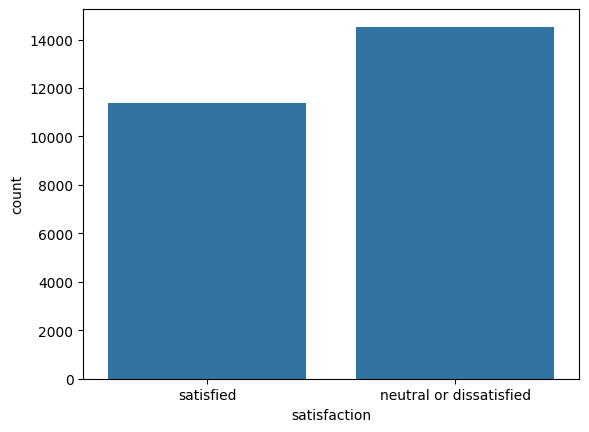

In [30]:
sns.countplot(x='satisfaction', data=dataTest)
print(dataTest['satisfaction'].value_counts())

# **Display Column Names of Training Set**

print(dataTrain.columns) outputs the list of feature names (i.e., column labels) in the training dataset.

This helps to verify which features are available and identify potential non-numeric or categorical columns that may need encoding.



In [8]:
print(dataTrain.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


# **Data Encoding and Target Mapping**

**One-Hot Encoding:**


*   Class column is one-hot encoded using pd.get_dummies() with drop_first=True to avoid multicollinearity.

*   This creates a binary column for each category (except the first one), and ensures compatibility with machine learning algorithms.



**Label Encoding:**



*   The following categorical columns are label-encoded: Gender, Customer Type, Type of Travel
*   LabelEncoder() converts each category into integer values (e.g., Male → 1, Female → 0).
*   The same encoder (le) is fit on the training set and then applied to the test set to maintain consistency and prevent data leakage.

**Target Label Mapping:**


*   The target column 'satisfaction' initially contains string labels.
*   It's mapped to integers for binary classification: 'neutral or dissatisfied' → 0; 'satisfied' → 1
*   value_counts() is printed before and after the transformation for verification.

In [9]:
hot_encoded_columns = ['Class']
dataTrain = pd.get_dummies(dataTrain, columns=hot_encoded_columns, drop_first=True, dtype=int)
dataTest = pd.get_dummies(dataTest, columns=hot_encoded_columns, drop_first=True, dtype=int)

label_encoded_columns = ['Gender','Customer Type','Type of Travel']
label_encoders = {}

for col in label_encoded_columns:
    le = LabelEncoder()
    dataTrain[col] = le.fit_transform(dataTrain[col])
    dataTest[col] = le.transform(dataTest[col])
    label_encoders[col] = le

print(dataTrain['satisfaction'].unique())

dataTrain['satisfaction'] = dataTrain['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

print(dataTrain['satisfaction'].value_counts())

dataTrain.head(10)

['neutral or dissatisfied' 'satisfied']
satisfaction
0    58697
1    44897
Name: count, dtype: int64


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,0,70172,1,0,13,1,460,3,4,3,...,3,4,4,5,5,25,18.0,0,0,1
1,1,5047,1,1,25,0,235,3,2,3,...,5,3,1,4,1,1,6.0,0,0,0
2,2,110028,0,0,26,0,1142,2,2,2,...,3,4,4,4,5,0,0.0,1,0,0
3,3,24026,0,0,25,0,562,2,5,5,...,5,3,1,4,2,11,9.0,0,0,0
4,4,119299,1,0,61,0,214,3,3,3,...,4,4,3,3,3,0,0.0,1,0,0
5,5,111157,0,0,26,1,1180,3,4,2,...,4,4,4,4,1,0,0.0,0,1,0
6,6,82113,1,0,47,1,1276,2,4,2,...,3,4,3,5,2,9,23.0,0,1,0
7,7,96462,0,0,52,0,2035,4,3,4,...,5,5,4,5,4,4,0.0,1,0,0
8,8,79485,0,0,41,0,853,1,2,2,...,2,1,4,1,2,0,0.0,0,0,0
9,9,65725,1,1,20,0,1061,3,3,3,...,3,4,4,3,2,0,0.0,0,1,0


# **Display Updated Feature Columns**

After encoding, print(dataTrain.columns) lists the current columns of the training dataset.

Label encoded columns ('Gender', 'Customer Type', 'Type of Travel') remain present and properly transformed.

The dataset is ready for modeling with numeric features only.

In [10]:
print(dataTrain.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


# **Prepare Features and Target for Modeling**

**Separate Features and Target:**

*  X and y are created from the training data by dropping and selecting the 'satisfaction' column.

*  Similarly, X_test and y_test are prepared from the test data.


**Feature Scaling:**

*  Features are standardized using StandardScaler.

*  The scaler is fit on training features and then applied to test features, ensuring no data leakage.


**Data Balancing with SMOTE:**

*  Synthetic Minority Over-sampling Technique (SMOTE) is applied after scaling.

*  This balances the classes in the training set by generating synthetic samples for the minority class.

*  Outputs are X_resampled and y_resampled, the balanced training features and labels.



In [11]:
X = dataTrain.drop(columns=['satisfaction'])
y = dataTrain['satisfaction']

X_test = dataTest.drop(columns=['satisfaction'])
y_test = dataTest['satisfaction']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# **Hybrid Model Training with Random Forest Hyperparameter Tuning**

This function implements a hybrid classification model combining a fixed MLP (the best performing MLP model) and a tuned Random Forest, following these steps:

**Random Forest Hyperparameter Grid:**

*  Explores combinations of n_estimators ([50, 100, 150]) and criterion (['gini', 'entropy', 'log_loss']).

*  These parameters control the number of trees and the split quality measure in RF.

**Data Splitting:**

*  Splits input data (X, y) into training (80%) and validation (20%) sets once for consistent evaluation.

**Train Fixed MLP Model:**

*  A single MLP model is trained with fixed architecture and hyperparameters on the training set, since it is the best performing model discovered.

*  This model remains constant across RF hyperparameter trials.

**Iterate Over RF Parameters:**

*  For each RF configuration, train the RF model on the training set.

*  Predict probabilities on the validation set from both MLP and RF models.

*  Compute the hybrid prediction by averaging the predicted probabilities.

*  Evaluate accuracy of the hybrid model on the validation set.

**Track Best RF Model:**

*  Stores the RF model and parameters yielding the highest hybrid accuracy.

**Output:**

*  Prints the accuracy for each RF configuration.

*  Returns the fixed MLP model, best RF model, and a DataFrame summarizing all results.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import itertools
import numpy as np
import pandas as pd

def train_hybrid_model_with_rf_tuning(X, y):
    n_estimators_options = [50, 100, 150]
    criterion_options = ['gini', 'entropy', 'log_loss']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                              activation='relu',
                              solver='adam',
                              learning_rate_init=0.01,
                              max_iter=50,
                              random_state=42)
    mlp_model.fit(X_train, y_train)

    best_accuracy = 0
    best_rf_model = None
    best_combo = None
    results = []

    print("🔍 Training Hybrid Models with Varying Random Forest Parameters...\n")

    for n_est, crit in itertools.product(n_estimators_options, criterion_options):
        try:
            rf_model = RandomForestClassifier(n_estimators=n_est,
                                              criterion=crit,
                                              random_state=42)
            rf_model.fit(X_train, y_train)

            mlp_probs = mlp_model.predict_proba(X_val)
            rf_probs = rf_model.predict_proba(X_val)

            hybrid_probs = (rf_probs + mlp_probs) / 2
            hybrid_preds = np.argmax(hybrid_probs, axis=1)

            acc = accuracy_score(y_val, hybrid_preds)

            results.append({
                'n_estimators': n_est,
                'criterion': crit,
                'accuracy': acc
            })

            print(f"✅ RF(n_estimators={n_est}, criterion={crit}) => Hybrid Accuracy: {acc:.4f}")

            if acc > best_accuracy:
                best_accuracy = acc
                best_rf_model = rf_model
                best_combo = (n_est, crit)

        except Exception as e:
            print(f"❌ Failed for n_estimators={n_est}, criterion={crit}: {e}")

    print(f"\n🏆 Best Hybrid Accuracy: {best_accuracy:.4f} with RF(n_estimators={best_combo[0]}, criterion={best_combo[1]})")
    return mlp_model, best_rf_model, pd.DataFrame(results)


# **Hybrid Model Training with SMOTE Data**

* Trains a fixed MLP and tunes Random Forest on SMOTE-balanced data.

* Combines both using averaged probabilities.

* Returns the trained MLP, best RF model, and a summary of RF tuning results.

In [32]:
mlp_model, best_rf_model, rf_results_df = train_hybrid_model_with_rf_tuning(X_resampled, y_resampled)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


🔍 Training Hybrid Models with Varying Random Forest Parameters...

✅ RF(n_estimators=50, criterion=gini) => Hybrid Accuracy: 0.9663
✅ RF(n_estimators=50, criterion=entropy) => Hybrid Accuracy: 0.9663
✅ RF(n_estimators=50, criterion=log_loss) => Hybrid Accuracy: 0.9663
✅ RF(n_estimators=100, criterion=gini) => Hybrid Accuracy: 0.9662
✅ RF(n_estimators=100, criterion=entropy) => Hybrid Accuracy: 0.9662
✅ RF(n_estimators=100, criterion=log_loss) => Hybrid Accuracy: 0.9662
✅ RF(n_estimators=150, criterion=gini) => Hybrid Accuracy: 0.9661
✅ RF(n_estimators=150, criterion=entropy) => Hybrid Accuracy: 0.9666
✅ RF(n_estimators=150, criterion=log_loss) => Hybrid Accuracy: 0.9666

🏆 Best Hybrid Accuracy: 0.9666 with RF(n_estimators=150, criterion=entropy)


# **Hybrid Model Training without SMOTE Data**

* Trains the same hybrid model, but on the original (non-SMOTE) scaled data.

* Helps compare performance with and without oversampling.

* Returns MLP, best RF, and tuning results on the imbalanced dataset.


In [33]:
mlp_model_no_smote, best_rf_model_no_smote, rf_results_no_smote = train_hybrid_model_with_rf_tuning(X_scaled, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


🔍 Training Hybrid Models with Varying Random Forest Parameters...

✅ RF(n_estimators=50, criterion=gini) => Hybrid Accuracy: 0.9656
✅ RF(n_estimators=50, criterion=entropy) => Hybrid Accuracy: 0.9653
✅ RF(n_estimators=50, criterion=log_loss) => Hybrid Accuracy: 0.9653
✅ RF(n_estimators=100, criterion=gini) => Hybrid Accuracy: 0.9660
✅ RF(n_estimators=100, criterion=entropy) => Hybrid Accuracy: 0.9657
✅ RF(n_estimators=100, criterion=log_loss) => Hybrid Accuracy: 0.9657
✅ RF(n_estimators=150, criterion=gini) => Hybrid Accuracy: 0.9659
✅ RF(n_estimators=150, criterion=entropy) => Hybrid Accuracy: 0.9658
✅ RF(n_estimators=150, criterion=log_loss) => Hybrid Accuracy: 0.9658

🏆 Best Hybrid Accuracy: 0.9660 with RF(n_estimators=100, criterion=gini)


# **Calculating Loss**

In [34]:
from sklearn.metrics import log_loss
hybrid_probs_test = (rf_probs_test + mlp_probs_test) / 2

hybrid_log_loss = log_loss(y_test, hybrid_probs_test)
print(f"Hybrid Model Log Loss: {hybrid_log_loss:.4f}")


Hybrid Model Log Loss: 0.0920


# **Hybrid Model Evaluation on Test Set**

This final cell evaluates the hybrid model (MLP + best tuned Random Forest) using the untouched test set:

* Predicts probabilities with both models and averages them for hybrid output.
* Maps numerical predictions back to original class labels ('satisfied', 'neutral or dissatisfied').
* Prints a detailed classification report with four decimal places for precision.
* Displays a confusion matrix to visualize prediction performance across both classes.

This gives a clear picture of how well the hybrid model generalizes to real-world, unseen data.


📊 Hybrid Model Evaluation on Original Test Set:
                         precision  recall  f1-score    support
neutral or dissatisfied     0.9611  0.9769    0.9689 14528.0000
satisfied                   0.9698  0.9495    0.9595 11365.0000
accuracy                    0.9649  0.9649    0.9649     0.9649
macro avg                   0.9655  0.9632    0.9642 25893.0000
weighted avg                0.9649  0.9649    0.9648 25893.0000


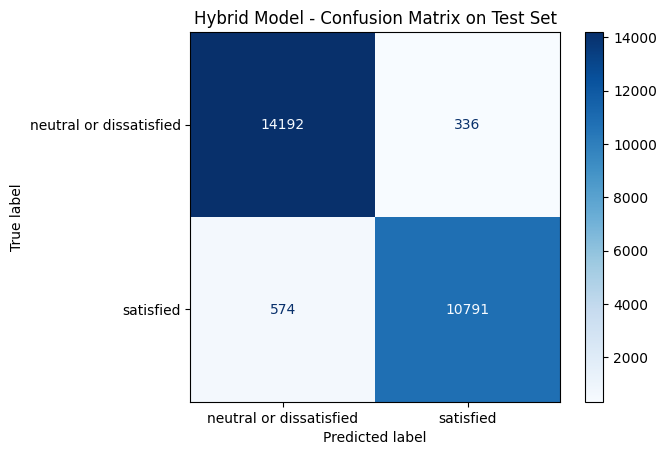

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

mlp_probs_test = mlp_model.predict_proba(X_test_scaled)
rf_probs_test = best_rf_model.predict_proba(X_test_scaled)

hybrid_probs_test = (rf_probs_test + mlp_probs_test) / 2
hybrid_preds_test = np.argmax(hybrid_probs_test, axis=1)

int_to_label = {0: 'neutral or dissatisfied', 1: 'satisfied'}
y_pred_labels = [int_to_label[p] for p in hybrid_preds_test]

print("\n📊 Hybrid Model Evaluation on Original Test Set:")
report_dict = classification_report(
    y_test, y_pred_labels, target_names=['neutral or dissatisfied', 'satisfied'], output_dict=True
)
df_report = pd.DataFrame(report_dict).transpose()
pd.options.display.float_format = '{:0.4f}'.format
print(df_report)

cm = confusion_matrix(y_test, y_pred_labels, labels=['neutral or dissatisfied', 'satisfied'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral or dissatisfied', 'satisfied'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Hybrid Model - Confusion Matrix on Test Set")
plt.show()
